In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib
import sys
import os

project_path = os.path.abspath('..')
if project_path not in sys.path:
    sys.path.append(project_path)



from MieSppForce import frenel, dipoles, green_func, force

c_const = 299792458
eps0_const = 1/(4*np.pi*c_const**2)*1e7
mu0_const = 4*np.pi * 1e-7

In [2]:
eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

R = 110
dist = 2
a_angle = np.pi/4
phase=0
STOP=45
angle=25*np.pi/180
point = [0,0,dist+R]

z0 = point[2]

wls=np.linspace(400,1100,60)

In [3]:
F_z_air = np.empty(len(wls))

for i in tqdm(range(len(wls))):
    f =  force.F(wls[i], 1, point, R, eps_Si, 0,amplitude=1,phase=0,a_angle=0, stop=STOP, full_output=False)
    F_z_air[i] = f[2]

F0 = np.max(np.abs(F_z_air))

100%|██████████| 60/60 [00:01<00:00, 39.15it/s]


In [4]:
F_x = np.empty((len(wls), 8))
F_y = np.empty_like(F_x)
F_z = np.empty_like(F_x)

for i in tqdm(range(len(wls))):
    f =  force.F(wls[i], eps_Au, point, R, eps_Si, angle,amplitude=1,phase=phase,a_angle=a_angle, stop=STOP, full_output=True)
    F_x[i,:] = f[0]
    F_y[i,:] = f[1]
    F_z[i,:] = f[2]

 30%|███       | 18/60 [00:35<01:28,  2.11s/it]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:444: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  im_retval = quad(imfunc, a, b, args, full_output, epsabs,
 38%|███▊      | 23/60 [00:47<01:25,  2.31s/it]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:441: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 60/60 [02:19<00:00,  2.32s/it]


In [5]:
P,M = np.empty((len(wls),3), dtype=complex),np.empty((len(wls),3), dtype=complex)
for i in tqdm(range(len(wls))):
    p,m = dipoles.calc_dipoles_v2(wls[i], eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)
    p,m = p[:,0],m[:,0]
    P[i,:],M[i,:]=p,m

100%|██████████| 60/60 [00:00<00:00, 2807.31it/s]


<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:24: SyntaxWarning: invalid escape sequence '\d'
C:\Users\borod\AppData\Local\Temp\ipykernel_27696\2599776526.py:22: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$, nm')
C:\Users\borod\AppData\Local\Temp\ipykernel_27696\2599776526.py:24: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$F_y$, $\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')


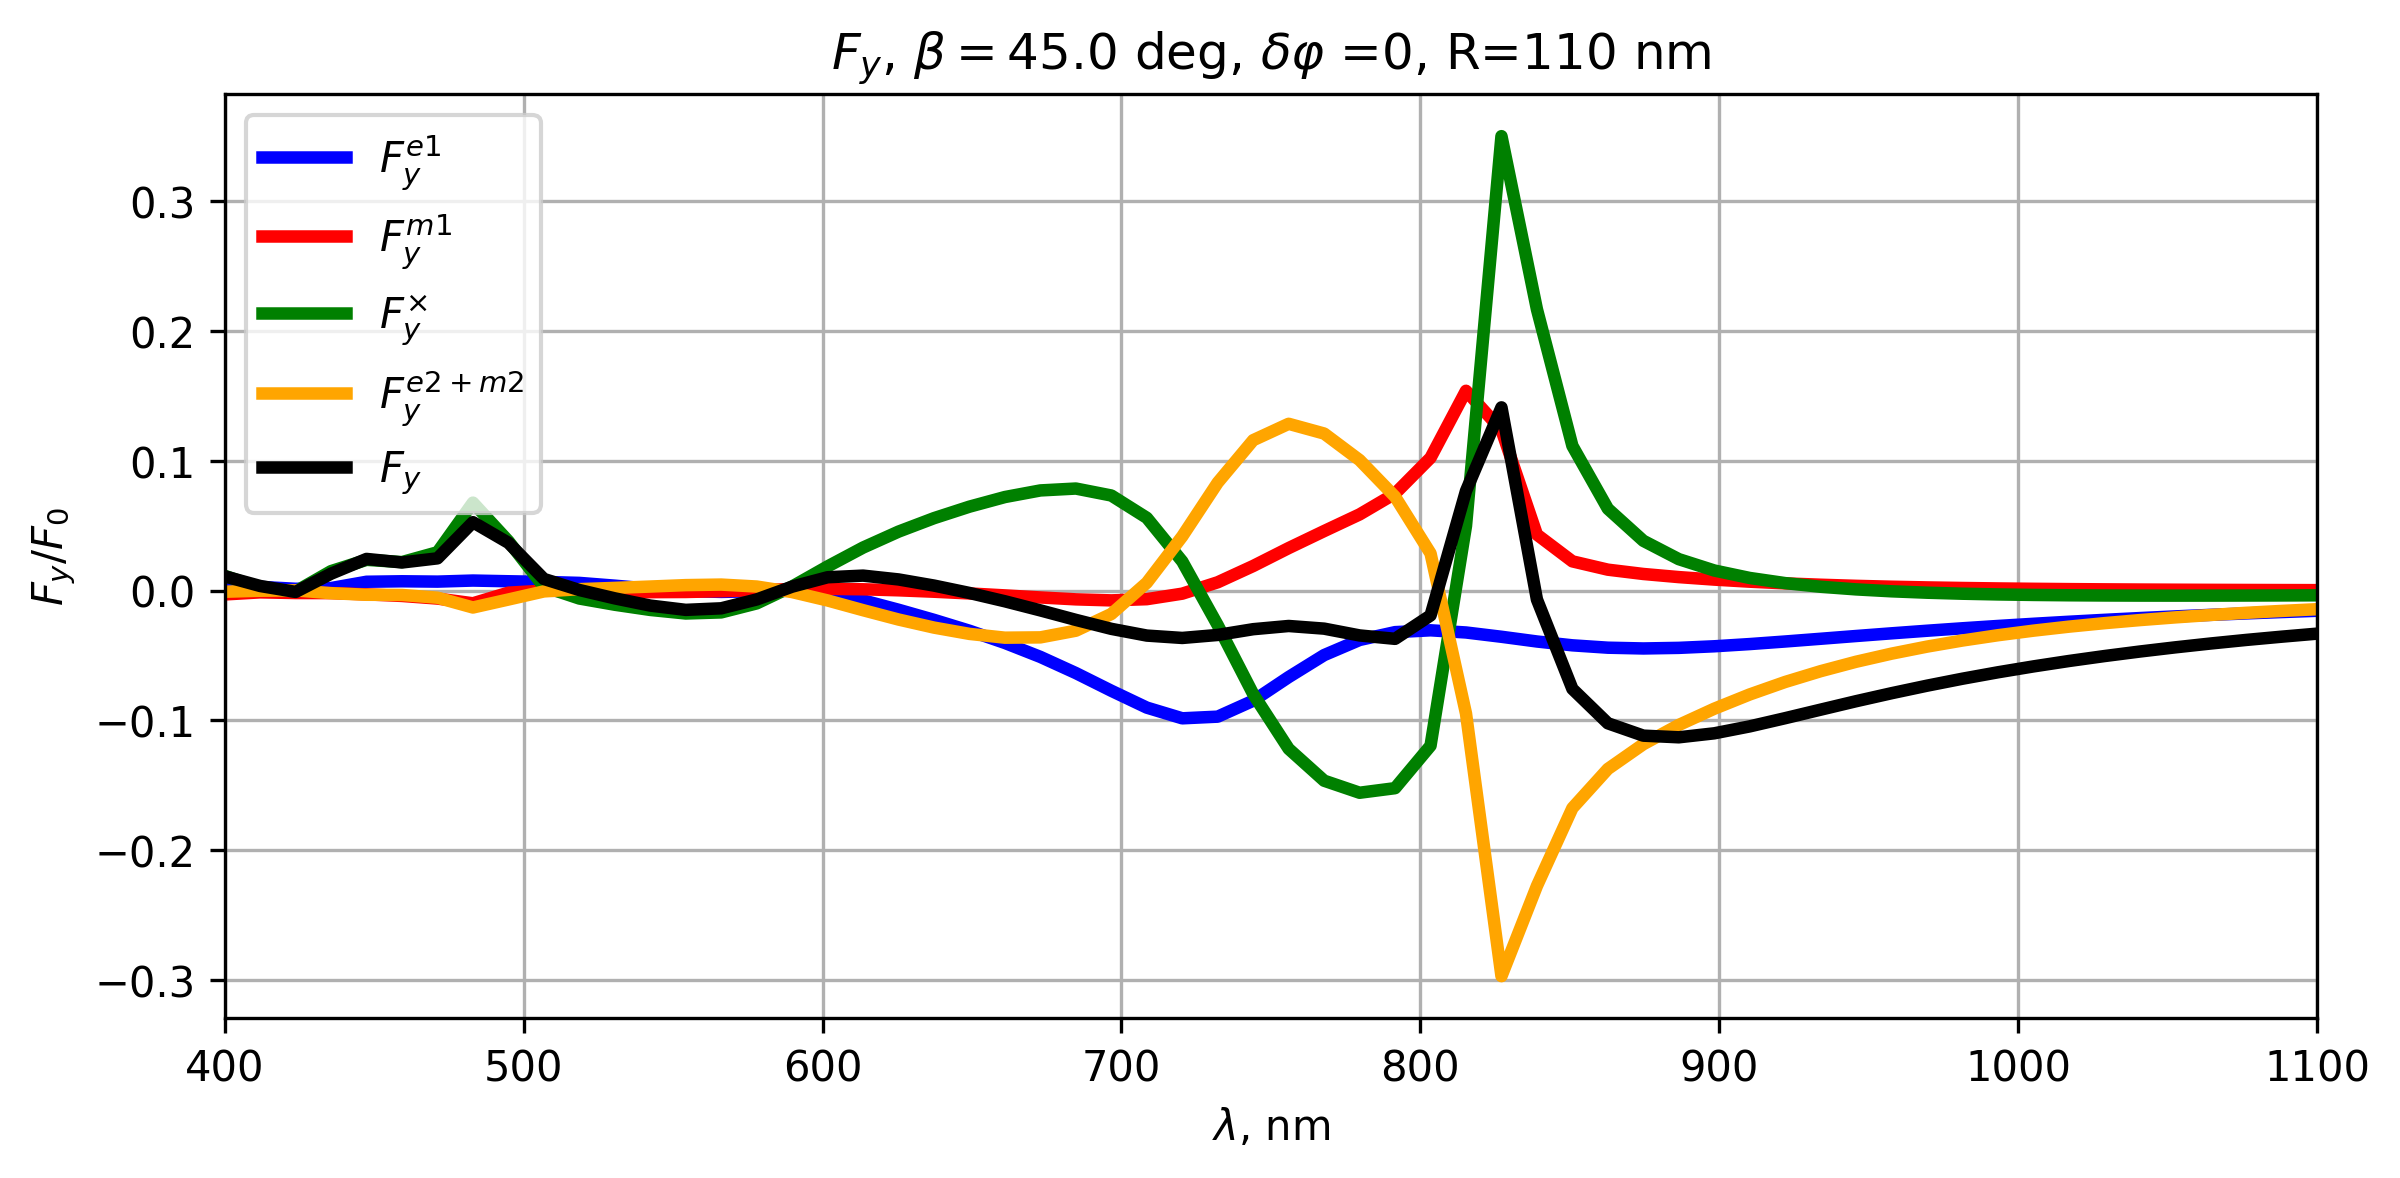

In [8]:
labels = ['$F_y$', '$F_y^{e0}$', '$F_y^{e1}$', '$F_y^{e2}$', '$F_y^{m0}$', '$F_y^{m1}$', '$F_y^{m2}$', '$F_y^{\\times}$']

c = ['black', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'g']

selected_components = [2,5,7]  # Choose from 0 to 7

# Plot all selected components
plt.figure(figsize=(9, 4), dpi=300)


for i, comp in enumerate(selected_components):
    plt.plot(wls, F_y[:, comp]/F0, label=labels[comp], lw=3, c=c[comp])
    
plt.plot(wls, (F_y[:, 3]+F_y[:,6])/F0, label='$F_y^{e2+m2}$', lw=3, c='orange')

# plt.plot(wls, (F_y[:, 5]+F_y[:,6])/F0, label='$F_y^m$', lw=3, c='r')

# plt.plot(wls, F_y[:, 7]/F0, label='$F_y^{\\times}$', lw=3, c='g')

plt.plot(wls, F_y[:, 0]/F0, label='$F_y$', lw=3, c=c[0])

plt.xlabel('$\lambda$, nm')
plt.ylabel('$F_y / F_0$')
plt.title(f'$F_y$, $\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt.legend(loc="upper left")
plt.grid()
plt.xlim(wls[0], wls[-1])
plt.savefig(f'Fy_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')
plt.show()

In [7]:
def AlphaE(R, eps_Si):
    return lambda wl: dipoles.alpha_v2(wl, R, eps_Si)[0]
def AlphaH(R, eps_Si):
    return lambda wl: dipoles.alpha_v2(wl, R, eps_Si)[1]

AlphaEE = AlphaE(R, eps_Si)
AlphaHH = AlphaH(R, eps_Si)


# plt.plot(wls, np.real(AlphaEE(wls)))

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\borod\AppData\Local\Temp\ipykernel_12412\2838428399.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$, nm')
C:\Users\borod\AppData\Local\Temp\ipykernel_12412\2838428399.py:8: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'Polarizability, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')


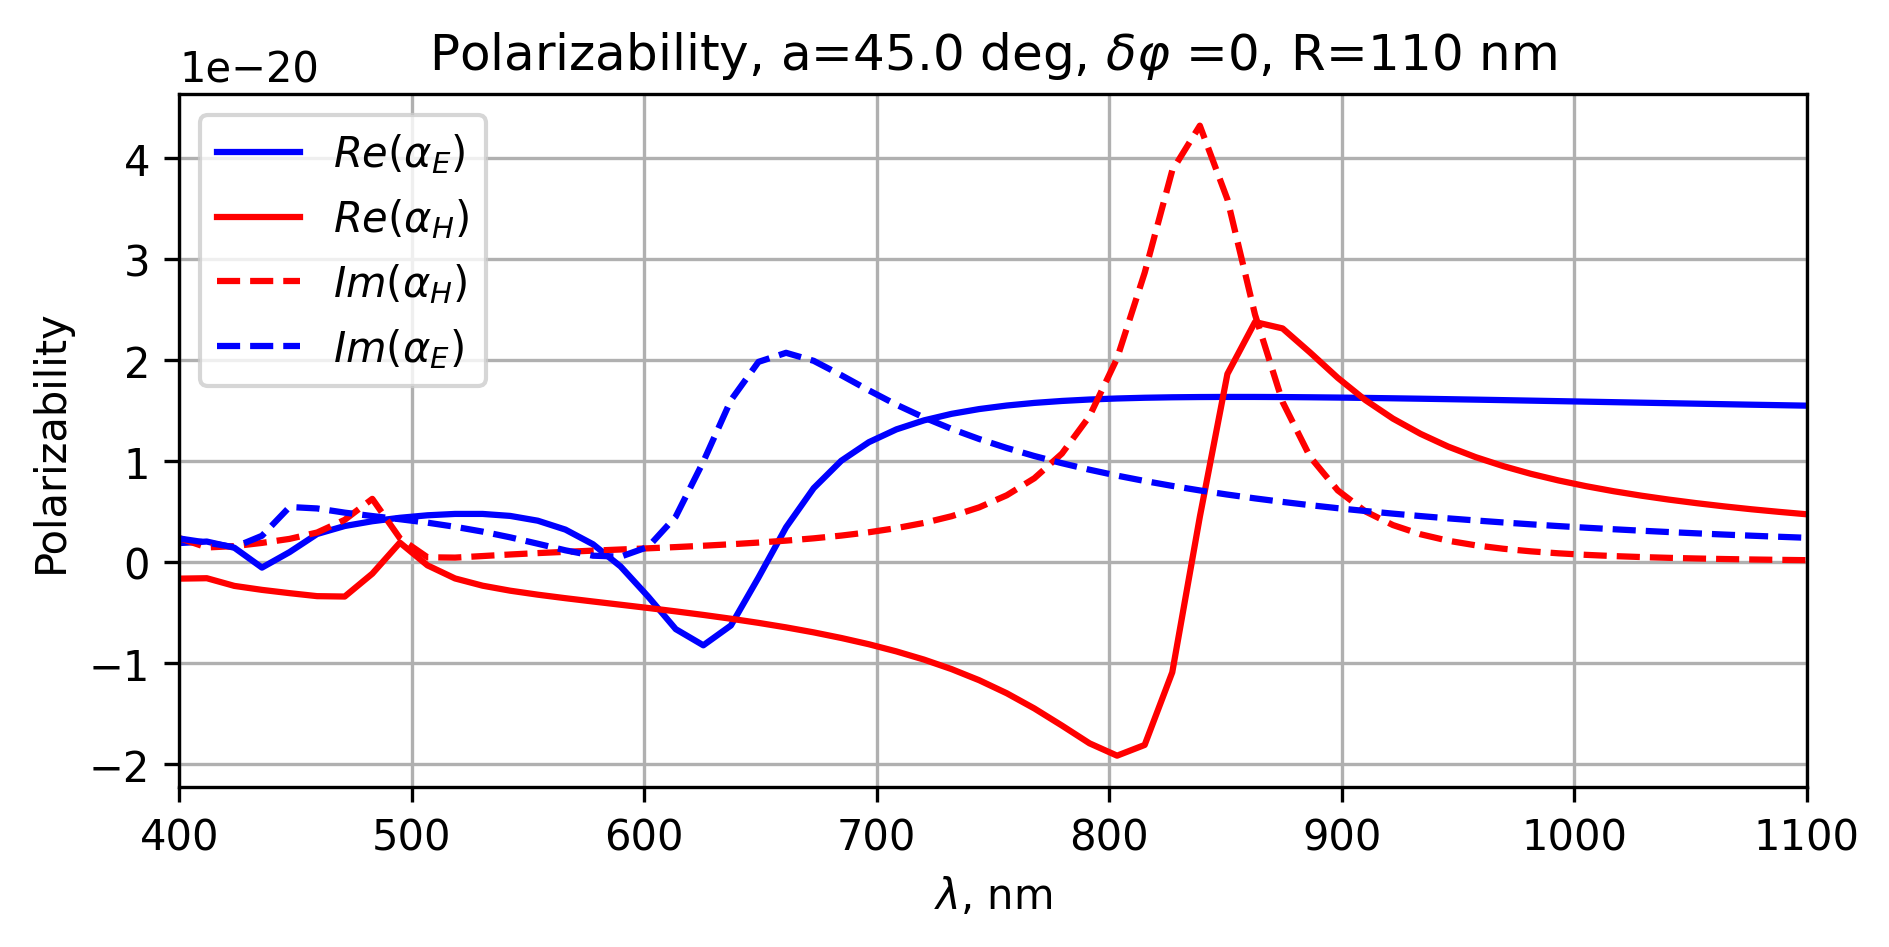

In [8]:
plt.figure(figsize=(7, 3), dpi=300)
plt.plot(wls, np.real(AlphaEE(wls)), label='$Re(\\alpha_E)$', c='b')
plt.plot(wls, np.real(AlphaHH(wls)), label='$Re(\\alpha_H)$', c='r')
plt.plot(wls, np.imag(AlphaHH(wls)), label='$Im(\\alpha_H)$' , c='r', ls='--')
plt.plot(wls, np.imag(AlphaEE(wls)), label='$Im(\\alpha_E)$', c='b', ls='--')
plt.xlabel('$\lambda$, nm')
plt.ylabel('Polarizability')
plt.title(f'Polarizability, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt.legend(loc="upper left")
plt.grid()
plt.xlim(wls[0], wls[-1])
plt.show()


In [9]:
k0 = lambda wl: 2*np.pi/wl/1e-9
omega = lambda wl: 2*np.pi*c_const/wl/1e-9

In [ ]:
sigma_ed = k0(wls) **4/(6 *np.pi * eps0_const**2) * ( np.abs(P[:,0])**2 + np.abs(P[:,1])**2 + np.abs(P[:,2])**2)
sigma_md = k0(wls) **4/(6 *np.pi * eps0_const**2) * ( np.abs(M[:,0])**2 + np.abs(M[:,1])**2 +np.abs(M[:,2])**2)/c_const**2
